# **import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Read data**

In [2]:
df = pd.read_csv("telecom_churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


# **Check for coloumns**

In [3]:
arr=np.array(df.columns)
arr

array(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan',
       'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls',
       'MonthlyCharge', 'OverageFee', 'RoamMins'], dtype=object)

# **Check for Total number of Rows and Coloumn**

In [4]:
df.shape

(3333, 11)

# **Check for Total Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


# **Check for Descrition of dataset**

In [6]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# **Check for Null values**

In [7]:
# df.isnull().sum()
df.isnull().any()

Churn              False
AccountWeeks       False
ContractRenewal    False
DataPlan           False
DataUsage          False
CustServCalls      False
DayMins            False
DayCalls           False
MonthlyCharge      False
OverageFee         False
RoamMins           False
dtype: bool

# **Check for classes **

In [8]:
df['Churn'].unique()

array([0, 1])

# **Check for how much percent people churn**

In [9]:
# df['Churn'].value_counts()

display(pd.crosstab(index=df.loc[:,'Churn'],columns='count'))
pd.crosstab(index=df.loc[:,'Churn'],columns='rel.frequency', normalize='columns')

col_0,count
Churn,
0,2850
1,483


col_0,rel.frequency
Churn,
0,0.855086
1,0.144914


In [10]:
y = df['Churn'].values 
X = df.drop(['Churn'],axis = 1).values

# **Visualization of Data**

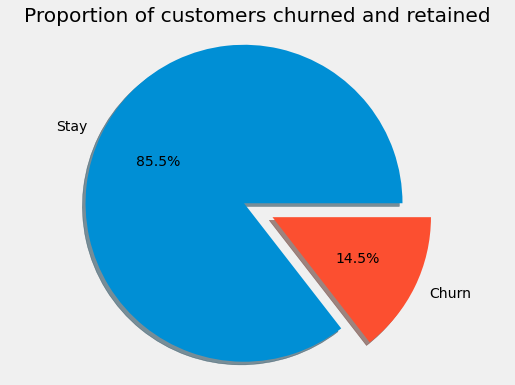

In [11]:
plt.style.use('fivethirtyeight')
labels = 'Stay', "Churn"
sizes = [df.Churn[df['Churn'] == 0].count(), df.Churn[df['Churn'] == 1].count()]
explode = (0.2, 0)

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

plt.title("Proportion of customers churned and retained")

plt.show()

# **Boxplot**

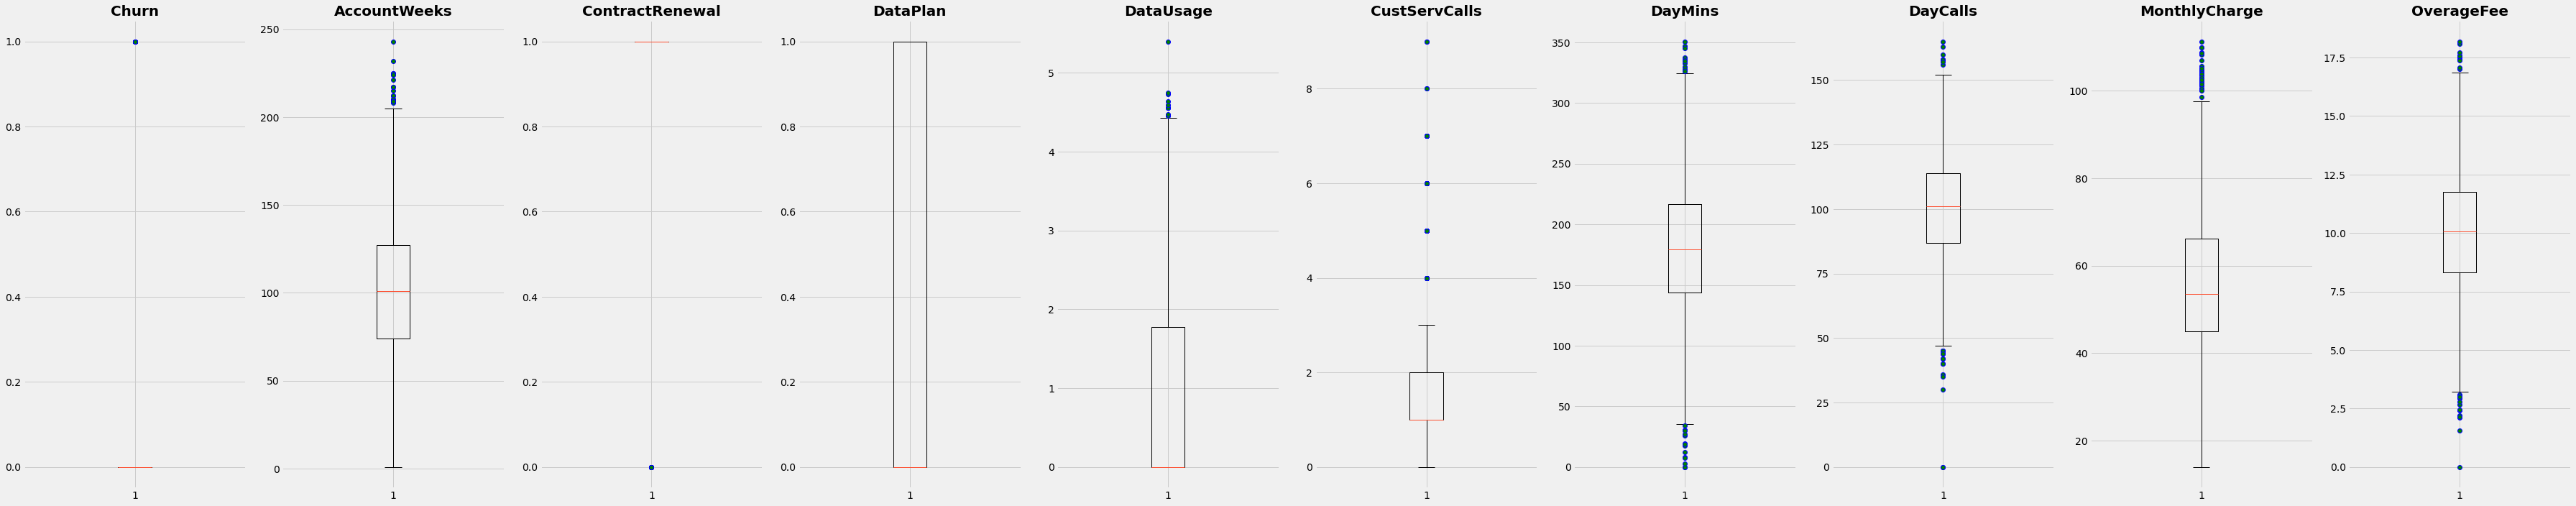

In [12]:
red_circle = dict(markerfacecolor='green', marker='o', markeredgecolor='blue')

fig, axs = plt.subplots(1, len(df[df.columns[0:10]].columns), figsize=(50,10))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df.iloc[:,i], flierprops=red_circle)
  ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

# **Scatterplot**

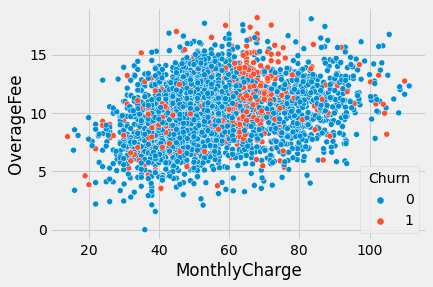

In [13]:
import seaborn as sns
sns.scatterplot(x='MonthlyCharge',y='OverageFee',hue='Churn', data=df)

# **Histogram**

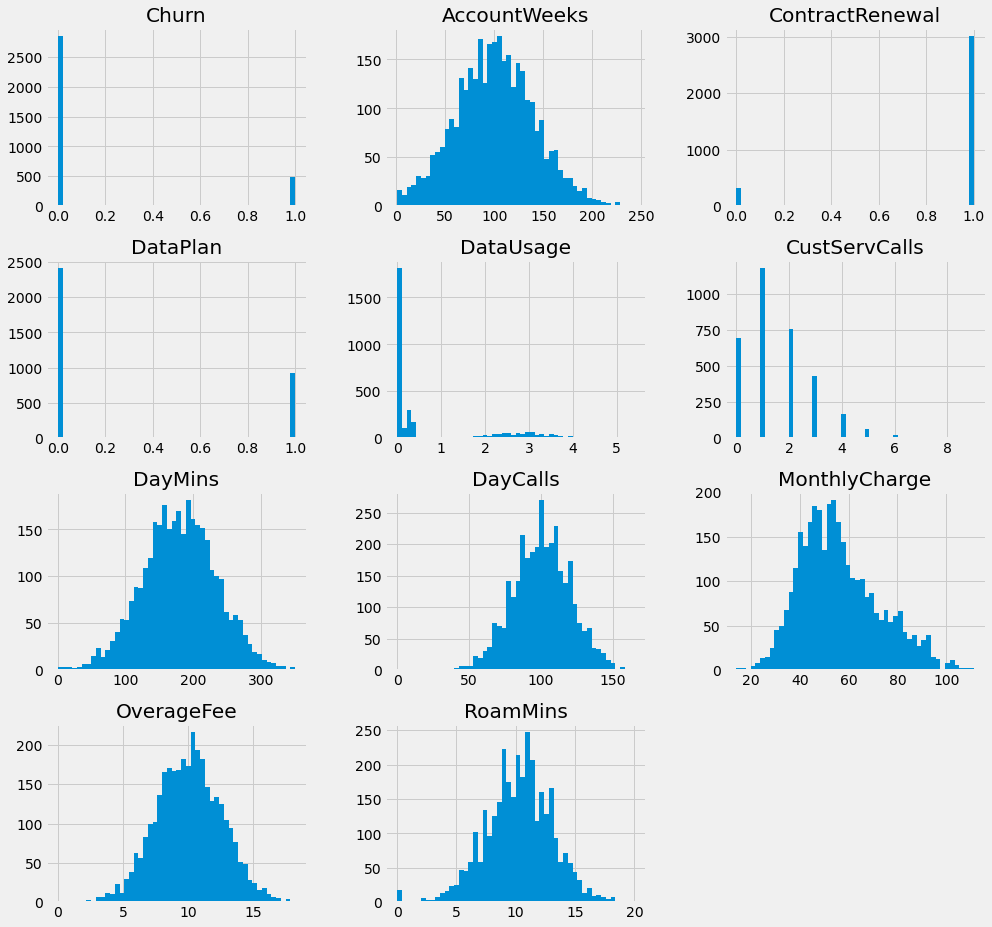

In [14]:
df.hist(
    figsize=(15,15)
    , bins=50
);


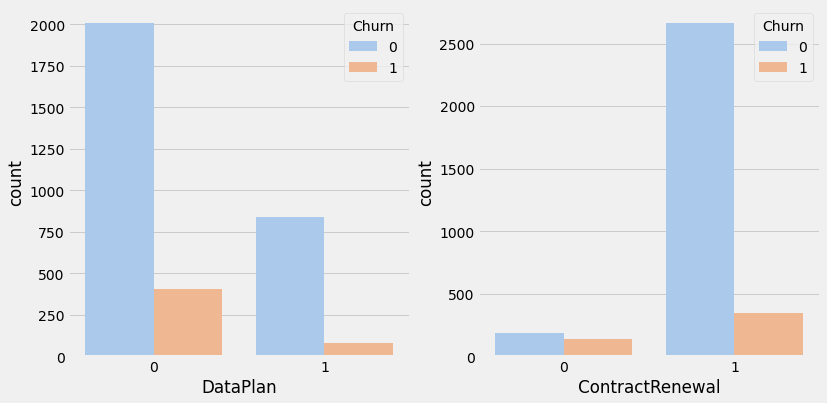

In [15]:
#Let's quickly look at the histogram of categorical varaibles
fig, axarr = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='DataPlan', hue = 'Churn',data = df, ax=axarr[0], palette="pastel")
sns.countplot(x='ContractRenewal', hue = 'Churn',data = df, ax=axarr[1], palette="pastel")

In [16]:
# plt.style.use('fivethirtyeight')
# fig, ax = plt.subplots(figsize=(12,10))
# var_cross_tab = pd.crosstab(index=df.loc[:,'CustServCalls'],columns=df.loc[:,'Churn'],normalize='index')
# var_cross_tab.plot(kind='bar', ax =ax)
# ax.xaxis.set_tick_params(labelrotation=0)
# ax.set(xlabel='Number of calls', ylabel='Proportion of churn', title='Churn when contacting customer service');

                    Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
Churn            1.000000      0.016541        -0.259852 -0.102148  -0.087195   
AccountWeeks     0.016541      1.000000        -0.024735  0.002918   0.014391   
ContractRenewal -0.259852     -0.024735         1.000000 -0.006006  -0.019223   
DataPlan        -0.102148      0.002918        -0.006006  1.000000   0.945982   
DataUsage       -0.087195      0.014391        -0.019223  0.945982   1.000000   
CustServCalls    0.208750     -0.003796         0.024522 -0.017824  -0.021723   
DayMins          0.205151      0.006216        -0.049396 -0.001684   0.003176   
DayCalls         0.018459      0.038470        -0.003755 -0.011086  -0.007962   
MonthlyCharge    0.072313      0.012581        -0.047291  0.737490   0.781660   
OverageFee       0.092812     -0.006749        -0.019105  0.021526   0.019637   
RoamMins         0.068239      0.009514        -0.045871 -0.001318   0.162746   

                 CustServCa

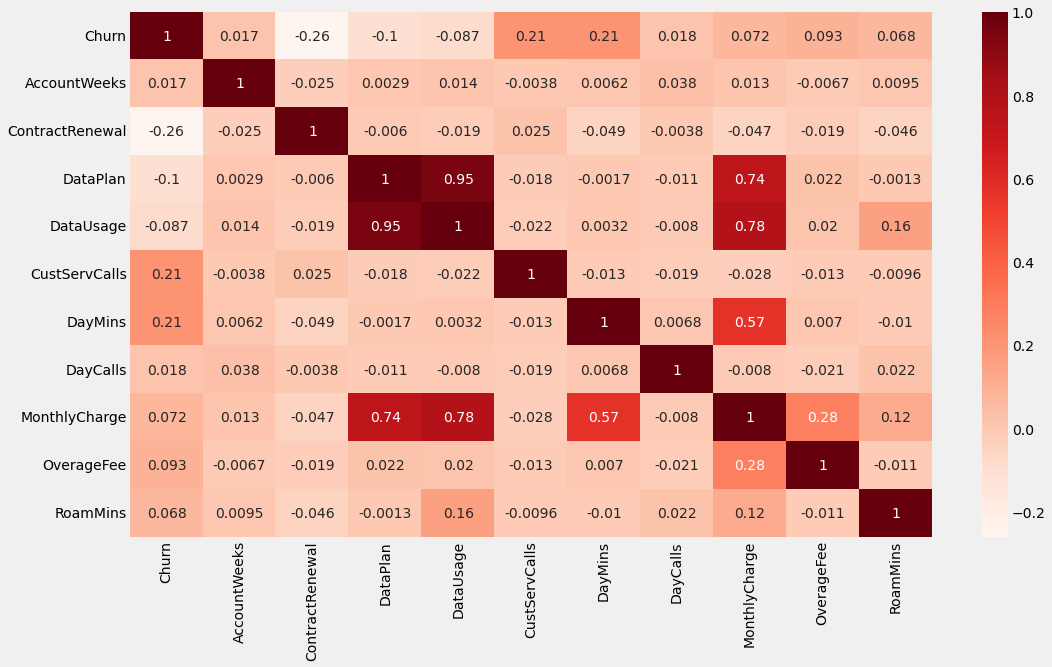

In [17]:

import matplotlib.pyplot as plt
print(df.corr())
# sns heatmap correlation
 
plt.figure(figsize=(16,9))


dataplot = sns.heatmap(df.corr(), cmap="Reds", annot=True)

plt.show()

# after checking the coorelation, we came to know that coloumn dataplan and datausage are highly coorelated so we can drop the highly coorelated coloumns later

In [18]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
df = df.drop(to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   CustServCalls    3333 non-null   int64  
 5   DayMins          3333 non-null   float64
 6   DayCalls         3333 non-null   int64  
 7   MonthlyCharge    3333 non-null   float64
 8   OverageFee       3333 non-null   float64
 9   RoamMins         3333 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 260.5 KB


<ipython-input-18-c82cc162cdab>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


here datausage has been droped 

In [19]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,3,166.7,113,41.0,7.42,10.1


# ***Remove Outliers ***

In [20]:
cols = ['DayMins', 'DayCalls','RoamMins'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# ***show boxplot to see if outliers are removed or not ***

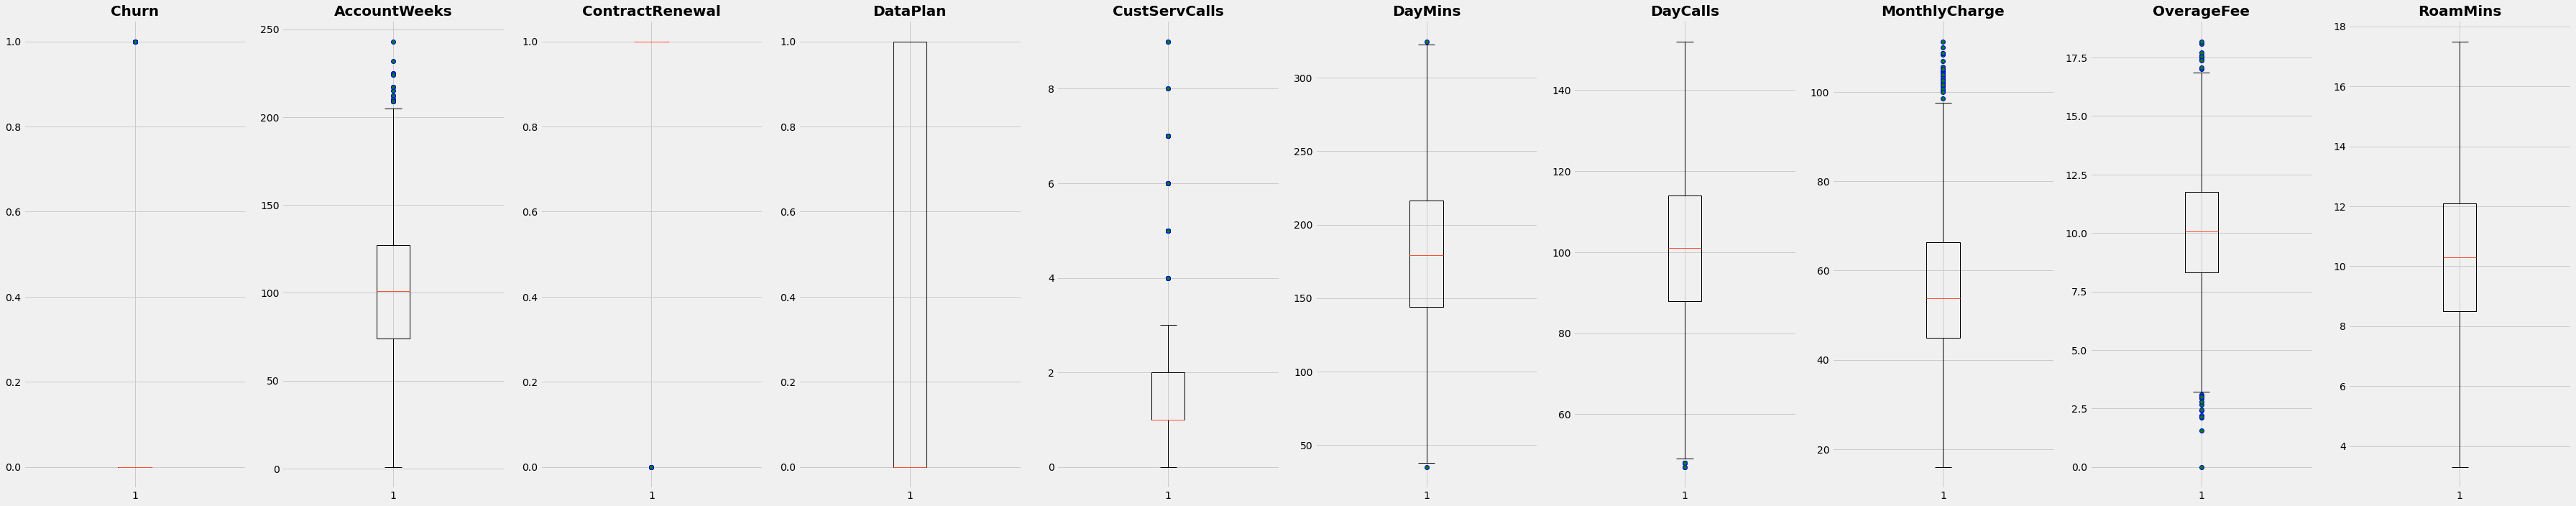

In [21]:
red_circle = dict(markerfacecolor='green', marker='o', markeredgecolor='blue')

fig, axs = plt.subplots(1, len(df[df.columns[0:10]].columns), figsize=(50,10))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df.iloc[:,i], flierprops=red_circle)
  ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

# **Modelling**

In [22]:
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.metrics import plot_confusion_matrix

# **Split in train and test**

In [23]:
label = df["Churn"]


#I seperate the data into train and test. We will reserve the test set till the end to test the performance of the best model.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)


In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2666, 10)
(667, 10)
(2666,)
(667,)


In [25]:
# from sklearn.preprocessing import StandardScaler
# SC = StandardScaler()
# X_train = SC.fit_transform(X_train)

In [26]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,3,166.7,113,41.0,7.42,10.1


# **Normalization**

In [27]:
from sklearn import preprocessing
import pandas as pd

min_max_scaler = preprocessing.MinMaxScaler()
column_names_to_normalize = ['AccountWeeks','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']
x = df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df[column_names_to_normalize] = df_temp
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3241 entries, 0 to 3332
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3241 non-null   int64  
 1   AccountWeeks     3241 non-null   float64
 2   ContractRenewal  3241 non-null   int64  
 3   DataPlan         3241 non-null   int64  
 4   CustServCalls    3241 non-null   int64  
 5   DayMins          3241 non-null   float64
 6   DayCalls         3241 non-null   float64
 7   MonthlyCharge    3241 non-null   float64
 8   OverageFee       3241 non-null   float64
 9   RoamMins         3241 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 278.5 KB


In [28]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0.524793,1,1,1,0.794199,0.600000,0.766002,0.542606,0.471831
1,0,0.438017,1,1,1,0.436809,0.723810,0.692550,0.537658,0.732394
2,0,0.561983,1,0,0,0.719268,0.638095,0.377754,0.333150,0.626761
3,0,0.342975,0,0,2,0.912638,0.228571,0.430220,0.170423,0.232394
4,0,0.305785,0,0,3,0.454420,0.628571,0.262329,0.407916,0.478873


In [29]:
X = df.drop(['Churn'], axis=1)
y = df['Churn'].values

# **Check for class imbalance**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


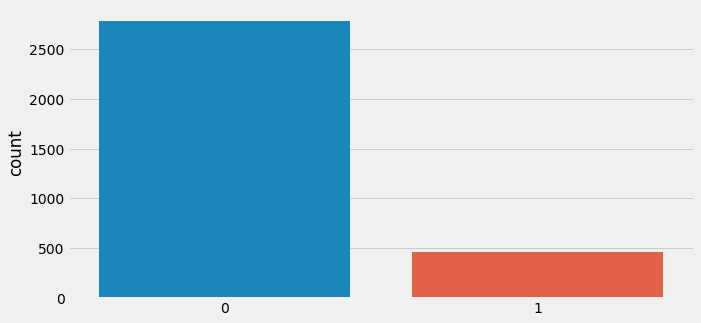

In [30]:
# visualize the Label count
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(y, label="count")

In [31]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# **Class has been balanced**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


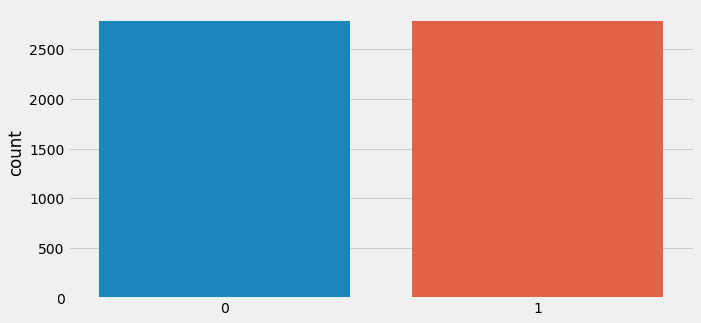

In [32]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(y, label="count")

In [33]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0.524793,1,1,1,0.794199,0.600000,0.766002,0.542606,0.471831
1,0,0.438017,1,1,1,0.436809,0.723810,0.692550,0.537658,0.732394
2,0,0.561983,1,0,0,0.719268,0.638095,0.377754,0.333150,0.626761
3,0,0.342975,0,0,2,0.912638,0.228571,0.430220,0.170423,0.232394
4,0,0.305785,0,0,3,0.454420,0.628571,0.262329,0.407916,0.478873


In [34]:
df = df.sample(frac = 1)

In [35]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
1569,0,0.297521,1,1,0,0.550069,0.542857,0.672613,0.483782,0.577465
3044,0,0.429752,1,0,1,0.384323,0.323810,0.335782,0.619021,0.366197
2901,1,0.347107,1,1,4,0.188881,0.390476,0.473242,0.641012,0.422535
410,0,0.099174,1,0,2,0.496202,0.409524,0.310598,0.388125,0.359155
26,0,0.231405,1,1,0,0.614296,0.647619,0.657922,0.525563,0.436620


# **Decision Tree**

Accuracy of classifier on test set: 0.92
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       579
           1       0.74      0.62      0.68        88

    accuracy                           0.92       667
   macro avg       0.84      0.80      0.82       667
weighted avg       0.92      0.92      0.92       667



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


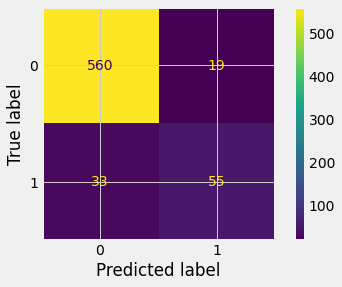

In [36]:
clfd = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10)
clfd.fit(X_train, y_train)

pd = clfd.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'.format(clfd.score(X_test, y_test)))
print(classification_report(y_test, pd))
plot_confusion_matrix(clfd, X_test, y_test)

# ***Random Forest ***

Accuracy of classifier on test set: 0.94
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       579
           1       0.80      0.72      0.75        88

    accuracy                           0.94       667
   macro avg       0.88      0.84      0.86       667
weighted avg       0.94      0.94      0.94       667



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


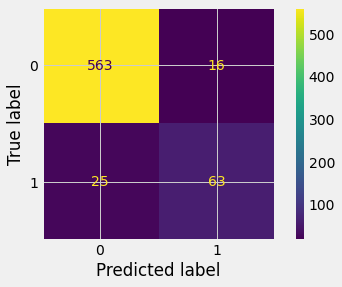

In [37]:
clfr = RandomForestClassifier(n_estimators=100, random_state=0)
clfr.fit(X_train, y_train)

pr = clfr.predict(X_test)

print('Accuracy of classifier on test set: {:.2f}'.format(clfr.score(X_test, y_test)))
print(classification_report(y_test, pr))
plot_confusion_matrix(clfr, X_test, y_test)

# **Gradient Boosting**

Accuracy of classifier on test set: 0.94
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       579
           1       0.79      0.70      0.75        88

    accuracy                           0.94       667
   macro avg       0.88      0.84      0.86       667
weighted avg       0.93      0.94      0.94       667



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


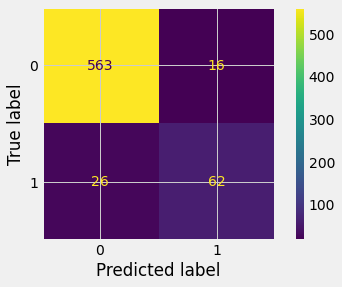

In [38]:
clfg = GradientBoostingClassifier(n_estimators=200, max_depth=2, random_state=0)
clfg.fit(X_train, y_train)

pg = clfg.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'.format(clfg.score(X_test, y_test)))
print(classification_report(y_test, pg))
plot_confusion_matrix(clfg, X_test, y_test) 

# **KNN**

Accuracy of classifier on test set: 0.87
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       579
           1       0.48      0.26      0.34        88

    accuracy                           0.87       667
   macro avg       0.69      0.61      0.63       667
weighted avg       0.84      0.87      0.85       667



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


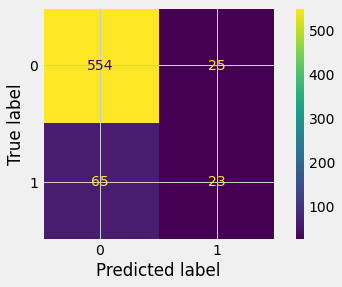

In [39]:
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)

pk = clfk.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'.format(clfk.score(X_test, y_test)))
print(classification_report(y_test, pk))
plot_confusion_matrix(clfk, X_test, y_test)

# **SVM**

Accuracy of classifier on test set: 0.87
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       579
           1       1.00      0.05      0.09        88

    accuracy                           0.87       667
   macro avg       0.94      0.52      0.51       667
weighted avg       0.89      0.87      0.82       667



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


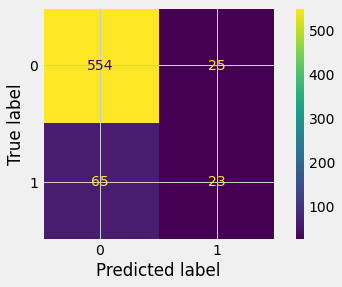

In [40]:
# clfsv = svm.SVC()
clfsv=svm.SVC(probability=True)
clfsv.fit(X_train, y_train)

psv = clfsv.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'.format(clfsv.score(X_test, y_test)))
print(classification_report(y_test, psv))
plot_confusion_matrix(clfk, X_test, y_test)

In [41]:
p1 = clfd.predict_proba(X_test)
p2 = clfr.predict_proba(X_test)
p3 = clfg.predict_proba(X_test)
p4 = clfk.predict_proba(X_test)
p5 = clfsv.predict_proba(X_test)


In [42]:
auc_score1 = roc_auc_score(y_test, p1[:,1])
auc_score2 = roc_auc_score(y_test, p2[:,1])
auc_score3 = roc_auc_score(y_test, p3[:,1])
auc_score4 = roc_auc_score(y_test, p4[:,1])
auc_score5 = roc_auc_score(y_test, p5[:,1])

print(auc_score1)
print(auc_score2)
print(auc_score3)
print(auc_score4)
print(auc_score5)



0.8753434605118543
0.901986183074266
0.90334039880672
0.6412898414193752
0.7159090909090909


In [43]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, p3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, p5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

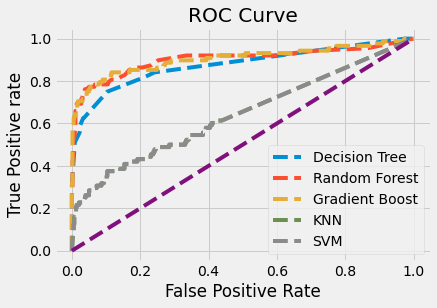

In [44]:
plt.plot(fpr1, tpr1, linestyle='--', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--', label='Gradient Boost')
plt.plot(fpr4, tpr4, linestyle='--', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')